In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy
from scipy.fft import fft
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

In [157]:
data = pd.read_csv('Все случаи по стране за день в динамике_2023-11-21_12-46-46.csv',header = "infer", sep=";", decimal = "," )

In [96]:
data.head()

,Дата,Заражений за день,Выздоровлений за день,Смертей за день
0,12.03.2020,34,0,0
1,13.03.2020,11,0,0
2,14.03.2020,14,0,0
3,15.03.2020,4,3,0
4,16.03.2020,28,2,0


In [97]:
a= data['Заражений за день']
b= data['Выздоровлений за день']
c=data['Смертей за день']

<function matplotlib.pyplot.show(close=None, block=None)>

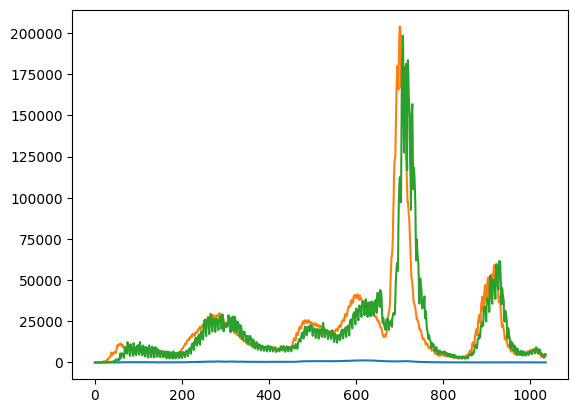

In [98]:
plt.plot(c)
plt.plot(a)
plt.plot(b)
plt.show

In [133]:
data['data'] = data['Заражений за день']
data['max'] = data.iloc[argrelextrema(data.data.values, np.greater_equal,
                                  order=50)[0]]['data']

In [134]:
#Даты соответствующие наивысшей заболеваемости
data['max_NaN'] = np.where(data['max'].isnull(), 0, 1)
print()
data = data[data['max_NaN'] != 0]
data['Дата']

60      11.05.2020
287     24.12.2020
484     09.07.2021
604     06.11.2021
701     11.02.2022
918     16.09.2022
1009    16.12.2022
Name: Дата, dtype: object

In [156]:
data = pd.read_csv('Все случаи по стране за день в динамике_2023-11-21_12-46-46.csv',header = "infer", sep=";", decimal = "," )
data['Дата'] = pd.to_datetime(data['Дата'])
d = np.mean(np.diff(data['Дата'])) / np.timedelta64(
1, 's')


<ipython-input-156-51a4d617f756>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Дата'] = pd.to_datetime(data['Дата'])


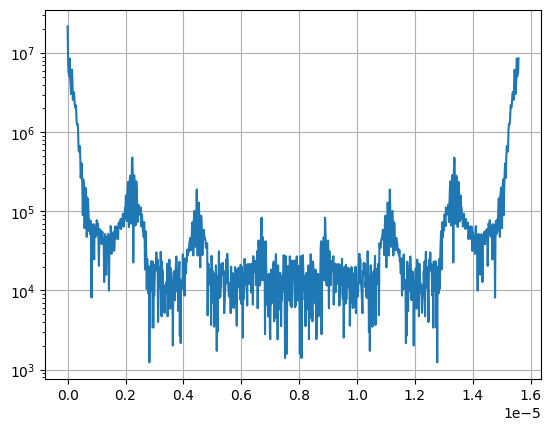

In [148]:
data_sec = []
for i in range(data.shape[0]):
      data_sec.append(i*86400)
f_d = 1/86400
data['seconds'] = data_sec
t_new = [i*d for i in range (int(max(data_sec)//86400))]
data_fourier = np.fft.fft(data['Заражений за день'])
fr = [i/t_new[-1] for i in range(len(data['Заражений за день']))]
plt.figure()
plt.semilogy(fr, abs(data_fourier))
plt.grid()

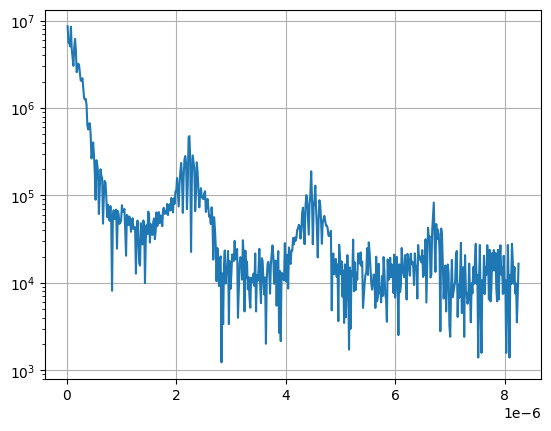

In [149]:
plt.semilogy(fr[1:550], abs(data_fourier)[1:550])
plt.grid()

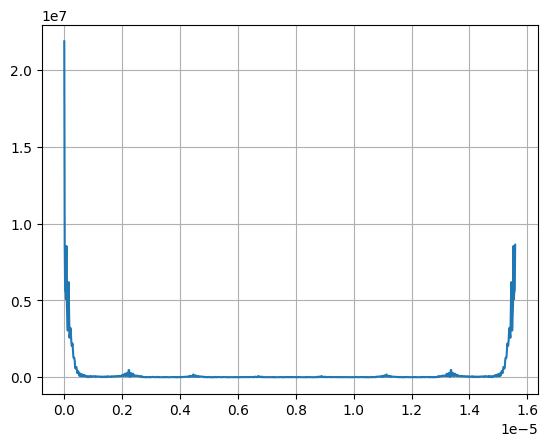

In [150]:
peaks = find_peaks(fr)
plt.figure()
plt.plot(fr, abs(data_fourier))
plt.grid()

In [151]:
data['fourier'] = abs(data_fourier)
data

,Дата,Заражений за день,Выздоровлений за день,Смертей за день,seconds,fourier
0,2020-12-03,34,0,0,0,2.184672e+07
1,2020-03-13,11,0,0,86400,8.621454e+06
2,2020-03-14,14,0,0,172800,5.636214e+06
3,2020-03-15,4,3,0,259200,5.622244e+06
4,2020-03-16,28,2,0,345600,5.082211e+06
...,...,...,...,...,...,...
1033,2023-09-01,2754,2990,41,89251200,8.538142e+06
1034,2023-10-01,3032,5062,47,89337600,5.082211e+06
1035,2023-11-01,4201,5122,46,89424000,5.622244e+06
1036,2023-12-01,4675,4541,48,89510400,5.636214e+06


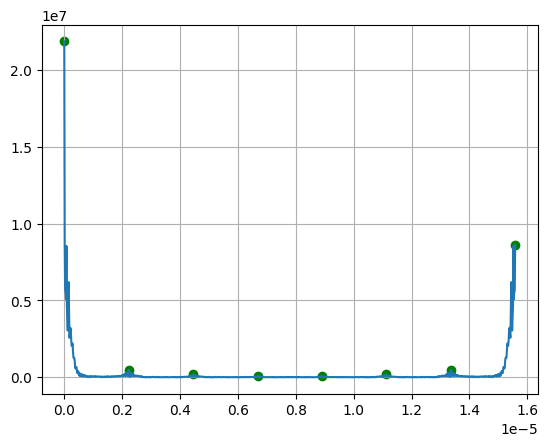

In [152]:
n = 50
data['local_max_fourier'] = data.iloc[argrelextrema(data.fourier.values,
                                                np.greater_equal,
                                                order=n)[0]]['fourier']
plt.plot(fr, abs(data_fourier))
plt.scatter(fr, data['local_max_fourier'], c='g')
plt.grid()

In [153]:
data['fr'] = fr
freq_of_fluc = data[abs(data_fourier) == data['local_max_fourier']].copy()
freq_of_fluc.index = np.arange(len(freq_of_fluc))
freq_of_fluc

,Дата,Заражений за день,Выздоровлений за день,Смертей за день,seconds,fourier,local_max_fourier,fr
0,2020-12-03,34,0,0,0,2.184672e+07,2.184672e+07,0.000000
1,2020-08-08,5212,6615,129,12873600,4.781567e+05,4.781567e+05,0.000002
2,2021-03-01,24150,19847,504,25660800,1.890479e+05,1.890479e+05,0.000004
3,2021-01-06,9500,8994,372,38534400,8.316752e+04,8.316752e+04,0.000007
4,2021-10-25,37930,20690,1069,51148800,8.316752e+04,8.316752e+04,0.000009
5,2022-03-23,26826,70622,429,64022400,1.890479e+05,1.890479e+05,0.000011
6,2022-08-18,35809,21491,62,76809600,4.781567e+05,4.781567e+05,0.000013
7,2023-01-13,5078,4271,47,89596800,8.621454e+06,8.621454e+06,0.000016


In [158]:
#Периодичность заболеваемости
l = []
for i in range(0, len(freq_of_fluc) - 1):
    r = freq_of_fluc.fr[i + 1] - freq_of_fluc.fr[i]
    l.append(r)
l = np.array(l)
days = (1 / (l * 3600 * 24))
print(np.round(days, 2))

[5.17 5.2  5.17 5.28 5.17 5.2  5.2 ]
